# Modernist Libraries Dataset Analysis
* By: Lucy Havens
* Researcher: Anouk Lang
* Data source file: ModernistLibraries20171025_UTF-8.csv
* Data Science for Design Assignment: 2
* Deadline: 15 November 2017

**Describe**

Dataset Overview:
* Data Type: CSV file of textual and numeric data including book titles, their authors, and their publishing dates and locations
* Source of dataset: LibraryThing.com
* Description: data about the libraries of 13 book owners

In [1]:
# import helpful tools for data analysis and visualization
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# pull in the Modernist Libraries dataset
ml = pd.read_csv('ModernistLibraries20171025_UTF-8', header=0)
#View the first few rows of the dataset
ml.head()
#ml.tail()

,BookOwnerVIAFID,BookOwnerName,WorkID,BookID,BookTitle,BookAuthorName,BookPubDetails,BookPubDate,BookNotes,BookCollection,InformationSource
0,97006051,Ernest Hemingway,4650949,25197870,Sinistro and celebration: 19 poems,A.E.T.,1956,1956,NaN,Finca Vigia.,manual entry
1,97006051,Ernest Hemingway,4650967,25198046,Tauromaquia y taurogogía: Algunos concertos bá...,R. Abarquero Durango,"Madrid: Torroba, 1959.",1959,NaN,Finca Vigia.,manual entry
2,97006051,Ernest Hemingway,429839,25198087,We pointed them North; recollections of a cowp...,Edward Charles Abbott,"Norman: University of Oklahoma Press [1955, c1...",1955,NaN,Finca Vigia.,Library of Congress
3,97006051,Ernest Hemingway,429839,25198220,We pointed them north; recollections of a cowp...,Edward Charles Abbott,"New York: Farrar & Rinehart, inc. [c1939]",1939,NaN,Finca Vigia.,Library of Congress
4,97006051,Ernest Hemingway,7785885,25198292,Japan unmasked,Hallett Edward Abend,"New York: I. Washburn, Inc., 1941.",1941,NaN,Finca Vigia.,Library of Congress


**Describe (continued)**

There are 23,351 entries of books in the dataset, organized into 11 columns:
1. BookOwnerVIAFID - the ID of the book owner in the Virtual International Authority File (VIAF) database
2. BookOwnerName - first and last names of the person who owned the book recorded in the corresponding row of the dataset (there are 13 distinct book owners in the dataset)
3. WorkID - the ID of the associated title+author combination (Note: the WorkID may repeat in the dataset for authors who each owned a copiy of the same book)
4. BookID - the ID of the copy of a book in the corresponding book owner's library (Note: the BookID should be a unique identifier for each row of the dataset)
5. BookTitle - the title of the book
6. BookAuthorName - name of the author of the book
7. BookPubDetails - publishing year, location, and company (Note: some rows have incomplete publishing information)
8. BookPubDate - the year, range of years or estimated year(s) the book was published
9. BookNotes - our researcher suggested we ignore this row, as many rows have no information
10. BookCollection - location of the book owner's library; our researcher suggested we ignore this, as the data is inconsistent across rows
11. InformationSource - the organisation where the data about the book owner and their book was found to enter on LibraryThing.com (there are 44 unique sources)

In [2]:
# Figure out the size of the dataset
mlSize = ml.shape
mlSize

(23351, 11)

In [211]:
# Figure out how many authors are in the dataset
print("Total Book Owners:", len(ml['BookOwnerName'].unique()))
uniqueOwners = ml['BookOwnerName'].unique()
print("Book Owner Names:")
for o in uniqueOwners:
    print(" - ", o)

Total Book Owners: 13
Book Owner Names:
 -  Ernest Hemingway
 -  James Joyce
 -  W.H. Auden
 -  Ezra Pound
 -  F. Scott Fitzgerald
 -  e.e. cummings
 -  W.B. Yeats
 -  Flannery O'Connor
 -  Virginia Woolf
 -  Gertrude Stein
 -  Edith Sitwell
 -  Edna St. Vincent Millay
 -  Langston Hughes


In [210]:
print("Modern Libraries Columns:", list(ml.columns))

# Remove extra space that appeared before certain column names ([ ... ' BookPubDate', ' BookNotes', ' BookCollection' ... ])
ml.columns = ['BookOwnerVIAFID', 'BookOwnerName', 'WorkID', 'BookID', 'BookTitle', 'BookAuthorName', 'BookPubDetails', 'BookPubDate', 'BookNotes', 'BookCollection', 'InformationSource']
print(ml.columns)

# create dictionaries of indeces associated with arrays that contain subsets of the dataset
totalRows = mlSize[0]

indeces = []
for n in range(0,totalRows):
    indeces += [n]
assert len(indeces) == ml.shape[0]

time = dict.fromkeys(indeces, '') # BookPubDetails, BookPubDate
pub = dict.fromkeys(indeces, '') # BookPubDetails
owners = dict.fromkeys(indeces, '') # BookOwnerName
authors = dict.fromkeys(indeces, '') # BookAuthorName
books = dict.fromkeys(indeces, 0) # BookID
for index,row in ml.iterrows():
    timeValue = str(row['BookPubDate'])
    time[index] = timeValue
    
    pubValue = str(row['BookPubDetails'])
    pub[index] = pubValue
    
    ownersValue = str(row['BookOwnerName'])
    owners[index] = ownersValue
    
    authorsValue = str(row['BookAuthorName'])
    authors[index] = authorsValue
    
    booksValue = int(row['BookID'])
    books[index] = booksValue


assert len(time) == totalRows, "The length of the time dictionary equal the total number of rows in the dataset"
assert len(pub) == totalRows,  "The length of the time dictionary equal the total number of rows in the dataset"
assert len(owners) == totalRows,  "The length of the time dictionary equal the total number of rows in the dataset"
assert len(authors) == totalRows,  "The length of the time dictionary equal the total number of rows in the dataset"
assert len(books) == totalRows,  "The length of the time dictionary equal the total number of rows in the dataset"

assert time[0] == ml.iloc[0, 7], "The time dictionary has the right values from the BookPubDate column"
assert pub[200] == ml.iloc[200, 6], "The pub dictionary has the right values from the BookPubDetails column"
assert owners[20020] == ml.iloc[20020, 1], "The owners dict has the right values from BookOwnerName"
assert authors[1001] == ml.iloc[1001, 5], "The authors dict has the right values from BookAuthorName"
assert books[3] == ml.iloc[3, 3], "The books dict has the right values from BookID"

Modern Libraries Columns: ['BookOwnerVIAFID', 'BookOwnerName', 'WorkID', 'BookID', 'BookTitle', 'BookAuthorName', 'BookPubDetails', 'BookPubDate', 'BookNotes', 'BookCollection', 'InformationSource']
Index(['BookOwnerVIAFID', 'BookOwnerName', 'WorkID', 'BookID', 'BookTitle',
       'BookAuthorName', 'BookPubDetails', 'BookPubDate', 'BookNotes',
       'BookCollection', 'InformationSource'],
      dtype='object')


In [5]:
# Figure out how many catalog information sources are in the dataset
print("Total Information Sources:", len(ml['InformationSource'].unique()))
infoSources = list(ml['InformationSource'].unique())
for source in infoSources:
    print(" - ", source)

Total Information Sources: 44
 -  manual entry
 -  Library of Congress
 -  amazon.com
 -  University of Chicago
 -  Washington Research Library Consortium
 -  British Library (powered by Talis)
 -  ILCSO (Illinois Libraries)
 -  Gemeinsamer Bibliotheksverbund (GBV)
 -  University of California, CDL
 -  University of Michigan
 -  Universidad Carlos III de Madrid
 -  Yale University
 -  UNC, Chapel Hill
 -  Columbia (CLIO)
 -  Cornell University
 -  Vlaamse Centrale Catalogus
 -  The Royal Library of Sweden (LIBRIS)
 -  amazon.fr
 -  Oxford University
 -  deastore.com
 -  SUDOC
 -  Universidad Autónoma de Madrid
 -  Canadian National Catalogue
 -  University of Texas, Tarlton Law Library
 -  NEBIS (Switzerland)
 -  National Library of Medicine, NIH
 -  Boston Athenaeum
 -  Johns Hopkins University
 -  Massachusetts Institute of Technology
 -  Georgia Tech University
 -  Glasgow University
 -  American Museum of Natural History
 -  University of Pennsylvania
 -  nan
 -  University of Cali

**Describe (continued)**

The BookPubDate column's data does not follow a standard format.  My researcher, Anouk Lang, is interested in understanding the relationship each book owner in the dataset has with time (for instance, did all the book owners have books published across a similar range of years?).  

I've cleaned up the dates according to the following (as discussed with my researcher):
* If one year is given, I'll put both in new columns for "StartYear" and "EndYear"
* If a range of years is given, I'll put the first in "StartYear" and the second in "EndYear"
* If an incomplete year is given, I'll estimate a range of years based on the provided data of years "StartYear" and "EndYear"
* If an invalid year is given, I'll estimate the correct year
* If no date is given, I'll put zero in "StartYear" and "EndYear"
* All dates in "StartYear" and "EndYear" will be ints

In [6]:
# Figure out the range of publication dates
pubDates = list(ml.loc[:, 'BookPubDate'])
#print(pubDates)
totalPubDates = len(pubDates)
assert totalPubDates == ml.shape[0], "There should be one BookPubDate value per row in the dataframe"

numeric = []
nonNumeric = []
for date in pubDates:
    date = str(date)
    if str.isdigit(date):
        numeric += [date]
    else:
        nonNumeric += [date]

for x in numeric:
    assert len(x) == 4, "All numeric dates should have 4 characters"
    assert str.isdigit(date), "All numeric dates' characters should be digits"

assert (len(numeric) + len(nonNumeric)) == len(pubDates), "All dates in the dataset should appear in either numeric or nonNumeric (not both"

AssertionError: All numeric dates should have 4 characters

In [8]:
print("nonNumeric Dates:", len(nonNumeric))
print("numeric Dates:", len(numeric))

# find book with invalid numeric date
invalidNumericDate = []
for d in numeric:
    if len(d) != 4:
        invalidNumericDate += [d]
print("Invalid Numeric Dates:", invalidNumericDate)
invalidDateIndeces = []
for d in invalidNumericDate:
    invalidDateIndeces += [pubDates.index(str(d))]
print(invalidDateIndeces)

nonNumeric Dates: 2567
numeric Dates: 20784
Invalid Numeric Dates: ['188', '18888']
[18497, 18812]


In [9]:
# import regular expression module
import re

In [10]:
# investigate non-numeric BookPubDate values
uniqueNonNumeric = np.unique(nonNumeric)
for value in uniqueNonNumeric:
    #print(i, ":", value)
    #i += 1
    print(value)

17 Nov 192
1784-1788
1784-1789
1795-1830
18 January 1815.
18--
1809-1812
1820?
1835-1843
1836-37
1845-1971
1849-1861
1850-1856
1851-1852
1851-1860
1853-1855
1853-1870
1854-1855
1856-1875
1862-1868.
1863-1887
1864-1870
1871-1884
1875-1880
1877-1878
1877-1883
1877-83
1878-1885
1878-1890
1880-1918
1882-1884
1882-1904
1883-1902
1883-1905
1885-1886
1885-1901
1885-86
1886-1889
1887-1898
1887-1902
1887/1890
189-
1892-1900
1893-1898
1893-1899
1896-1942
1897-1900
1897-1905
1897-1924
1898-1899
1898-1905
1899-1900
1899-1904
19--
190-
1900-1904
1901-1918
1902-05
1902?
1903-1905
1903-1916
1903?
1904-1907
1906-10.
1906-1907
191-
1913?
1914-1919
1915-17
1915?
1916-1917
1916-21
1919-21
192-
1922-1924
1922-23
1923-1931
1924-1934
1924-35
1924-38
1925 [?]
1926-1929
1927-
1928-29
1928-30
193-
1930-1
1930-1931
1931-34
1933-1938
1933-1950
1934?
1935-1951
1935-1961
1935-1984
1935?
1936-1937
1937-38
1938-41
1938?
194-
1942-46
1945-1953
1946 [?]
1949-1972
1949?
195-
1954-5
1954-55
1955-56
1956-1957
1957-1979
1

In [12]:
# define lists to create for new StartYear and EndYear columns
StartYear = []
EndYear = []
for d in pubDates:
    d = str(d)
    d = d.lower()
    d = d.strip('abcdefghijklmnopqrstuv')
    d = d.strip(',')
    d = d.strip('[')
    d = d.strip('?]')
    d = d.strip(']')

    # fix invalid values that are all numeric
    if d == '188' or d == '18888':
        StartYear += [int(1888)]
        EndYear += [int(1888)]
    
    else:
    
        # get all four-digit years into StartYear and EndYear
        y0 = re.search('[1-9]{1}[0-9]{3}$', d)  # example: 1926
        if y0 != None:
            add0 = y0.group(0)
            StartYear += [int(add0)]
            EndYear += [int(add0)]
            if len(add0) != 4:
                print(add0)
    
        # divide ranges of years into StartYear and EndYear
        elif len(d) > 3:
            y1 = re.search('[1-9]{1}[0-9]{3}-[0-9]{1}$', d)  # example: 1990-1
            if y1 != None:
                add1 = y1.group(0)
                s1 = (add1[0]+add1[1]+add1[2]+add1[3])
                e1 = (add1[0]+add1[1]+add1[2]+add1[5])
                StartYear += [int( s1 )]
                EndYear += [int( e1 )]
                if len(s1) != 4:
                    print(s1)
                    print("Add1:", add1)
                if len(e1) != 4:
                    print(e1)
                    print("Add1:", add1)
            else:
                y2 = re.search('[1-9]{1}[0-9]{3}-[0-9]{2}$', d)  # example: 1940-45
                if y2 != None:
                    add2 = y2.group(0)
                    s2 = (add2[0]+add2[1]+add2[2]+add2[3])
                    e2 = (add2[0]+add2[1]+add2[5]+add2[6])
                    StartYear += [int( s2 )]
                    EndYear += [int( e2 )]
                    if len(s2) != 4:
                        print(s2)
                        print("Add2:", add2)
                    if len(e2) != 4:
                        print(e2)
                        print("Add2:", add2)
                else:
                    y3 = re.search('([1-9]{1}[0-9]{3})(-|\/)([1-9]{1}[0-9]{3})', d)  # example: 1930-1940
                    if y3 != None:
                        add3 = y3.group(0)
                        s3 = (add3[0]+add3[1]+add3[2]+add3[3])
                        e3 = (add3[5]+add3[6]+add3[7]+add3[8])
                        StartYear += [int( s3 )]
                        EndYear += [int( e3 )]
                        if len(s3) != 4:
                            print(s3)
                            print("Add3:", add3)
                        if len(e3) != 4:
                            print(e3)
                            print("Add3:", add3)
                    else:

        # create ranges for incomplete years
                        y4 = re.search('\d{2}-{2}$', d)  # example: 19--
                        if y4 != None:
                            add4 = y4.group(0)
                            s4 = (add4[0]+add4[1]+'0'+'0')
                            e4 = (add4[0]+add4[1]+'9'+'9')
                            StartYear += [int( s4 )]
                            EndYear += [int( e4 )]
                            if len(s4) != 4:
                                print(s4)
                                print("Add4:", add4)
                            if len(e4) != 4:
                                print(e4)
                                print("Add4:", add4)
                        else:
                            y5 = re.search('\d{3}-{1}$', d)  # example: 193-
                            if y5 != None:
                                add5 = y5.group(0)
                                s5 = (add5[0]+add5[1]+add5[2]+'0')
                                e5 = (add5[0]+add5[1]+add5[2]+'9')
                                StartYear += [int( s5 )]
                                EndYear += [int( e5 )]
                                if len(s5) != 4:
                                    print(s5)
                                    print("Add5:", add5)
                                if len(e5) != 4:
                                    print(e5)
                                    print("Add5:", add5)

        # make the rest 0 (will need to compare to pub details or investigate online)
                            else:
                                StartYear += [int(9999)]
                                EndYear += [int(9999)]
        else:
            StartYear += [int(9999)]
            EndYear += [int(9999)]

In [13]:
for pubDate in StartYear:
    assert type(pubDate) == int, "All start dates should be ints"
    assert len(str(pubDate)) == 4, "All start dates should be four digits long"
for pubDate in EndYear:
    assert type(pubDate) == int, "All end dates should be ints"
    assert len(str(pubDate)) == 4, "All end dates should be four digits long"
assert len(StartYear) == mlSize[0], "There should be one StartYear value for every row in the dataset"
assert len(EndYear) == mlSize[0], "There should be one EndYear value for every row in the dataset"

In [32]:
ownerDateDf = pd.DataFrame( { 'BookOwnerName' : list(ml.loc[:, 'BookOwnerName']), 'StartYear' : StartYear, 'EndYear' : EndYear  })
ownerDateDf.head()

,BookOwnerName,EndYear,StartYear
0,Ernest Hemingway,1956,1956
1,Ernest Hemingway,1959,1959
2,Ernest Hemingway,1955,1955
3,Ernest Hemingway,1939,1939
4,Ernest Hemingway,1941,1941


**Explore**

Below I've analysed the time data available in the Modernist Libraries dataset by separating out the start and end dates of the ranges of years that are in the CSV file, and by separating valid dates from dates that require further investigation because a valid date format could not be reasonably inferred from the original CSV file's value.

Number of unknown dates: 7071
Number of unknown start dates: 2359
Number of unknown end dates: 2359
Earliest known publication date: 1000
Latest known publication date: 2007
Mean range of years for multi-date publication: 42.8737864078
Median year for single-date publication: 1934.0


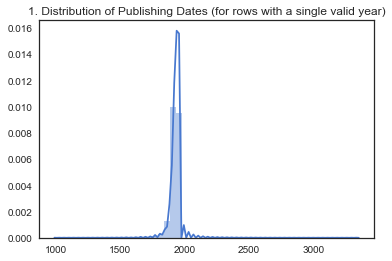

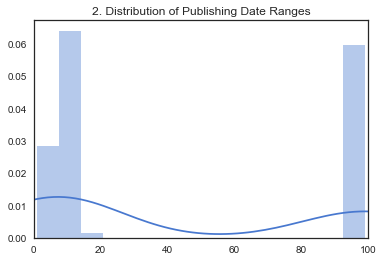

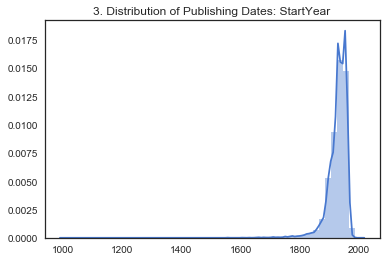

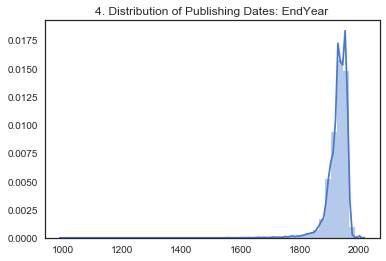

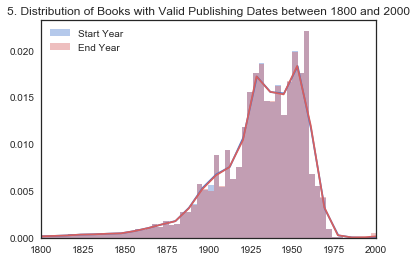

In [159]:
startToInvestigate = 0
endToInvestigate = 0
validStartYears = []
validEndYears = []
for pubDate in StartYear:
    if pubDate == 0 or pubDate > 2017:
        startToInvestigate += 1
    else:
        validStartYears += [pubDate]

for pubDate in EndYear:
    if pubDate == 0 or pubDate > 2017:
        endToInvestigate += 1
    else:
        validEndYears += [pubDate]

yearRanges = []
singleYear = []
toInvestigate = 0
for i in range(0, (mlSize[0])):
    if (StartYear[i] == 9999) or (EndYear[i] == 9999):
        toInvestigate += 1
    elif StartYear[i] < EndYear[i]:
        yearRanges += [EndYear[i] - StartYear[i]]
    elif StartYear[i] == EndYear[i]:
        singleYear += [StartYear[i]]
    else:
        toInvestigate += 1

print("Number of unknown dates:", (startToInvestigate + endToInvestigate + toInvestigate))
print("Number of unknown start dates:", startToInvestigate)
print("Number of unknown end dates:", endToInvestigate)
print("Earliest known publication date:", np.min(validStartYears))
print("Latest known publication date:", np.max(validEndYears))
print("Mean range of years for multi-date publication:", np.mean(yearRanges))
print("Median year for single-date publication:", np.median(singleYear))


sns.set(style="white", palette="muted", color_codes=True)

chart = sns.distplot(singleYear)
chart.set_title('1. Distribution of Publishing Dates (for rows with a single valid year)')
plt.show()

chart = sns.distplot(yearRanges, bins=15)
chart.set_title('2. Distribution of Publishing Date Ranges')
plt.xlim(0,100)
plt.show()

chart = sns.distplot(validStartYears)
chart.set_title('3. Distribution of Publishing Dates: StartYear')
plt.show()

chart = sns.distplot(validEndYears)
chart.set_title('4. Distribution of Publishing Dates: EndYear')
plt.show()

chart = sns.distplot(validStartYears, bins=300, color="b", label="Start Year")
chart = sns.distplot(validEndYears, bins=300, color="r", label="End Year")
chart.set_title('5. Distribution of Books with Valid Publishing Dates between 1800 and 2000')
plt.xlim(1800,2000)
plt.legend()
plt.show()

**Explore (continued)**

#1: Upon visualizing the distribution of publishing dates, there still are a number of dates whose values should be verified, because it's highly unlikely one of the book owners had a book published in the year 1000.

#2, #3: The distribution of publishing dates with a range (StartYear and EndYear) looks more realistic, as the values lie between about 1800 and 2000 on both the StartYear and EndYear graphs.

#4: The distribution of publishing date ranges indicates that there are a number of books for which the exact publishing date is uncertain.  The rows in the dataset with these dates could be compared to any date that may be provided in the BookPubDetails column, or could be manually looked up online to see if an exact date is available from a source other than the one noted in the InformationSource column.

#5. Looking closer at the distribution of publishing dates available in the dataset, we can see that the time period in which most books in the owners' libraries were published between 1925 and 1960.  Additionally, the dates in the StartYear and EndYear columns frequently overlap, indicating that for most books, the dataset has a single publication year rather than a range of possible publication years.

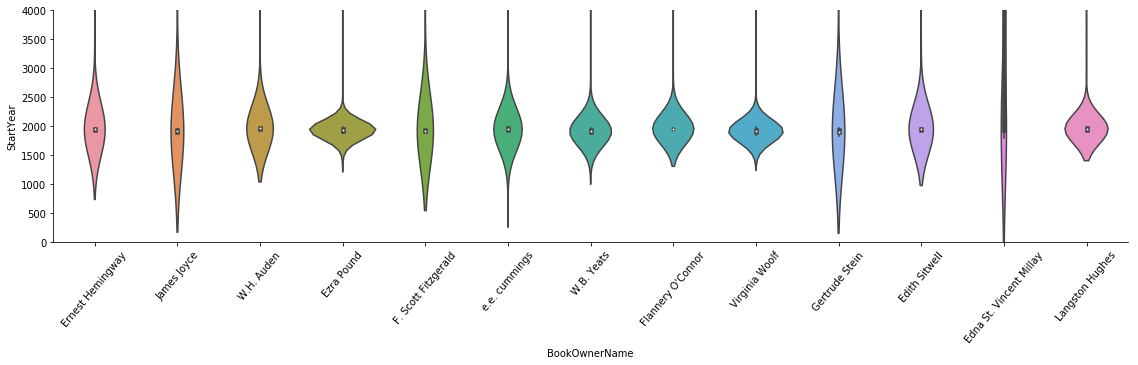

In [103]:
sns.factorplot(x='BookOwnerName', y='StartYear', data=ownerDateDf, kind='violin', aspect=4).set_xticklabels(rotation=50)
plt.ylim(0,4000)  # ignore the 9999 dates that indicate an unknown publication date
plt.show()

**Explore (continued)**

Even ignoring the uknown publication dates that have the value "9999," there still appears to be some data cleanup needed to make sure the publication dates are valid, because many of the dates extend into the future.  The publication dates should be compared against the dates the owners were alive to help identify which dates are invalid.

Looking at books published between 1800 and 1900 (a realistic time frame within which all owners could have had books published): 
Ezra pound and Virginia Woolf appear to have the largest libraries as recorded in the Modernist Libraries dataset;
Edina St. Vincent Millay, Gertrude Stein and James Joyce, the smallest.

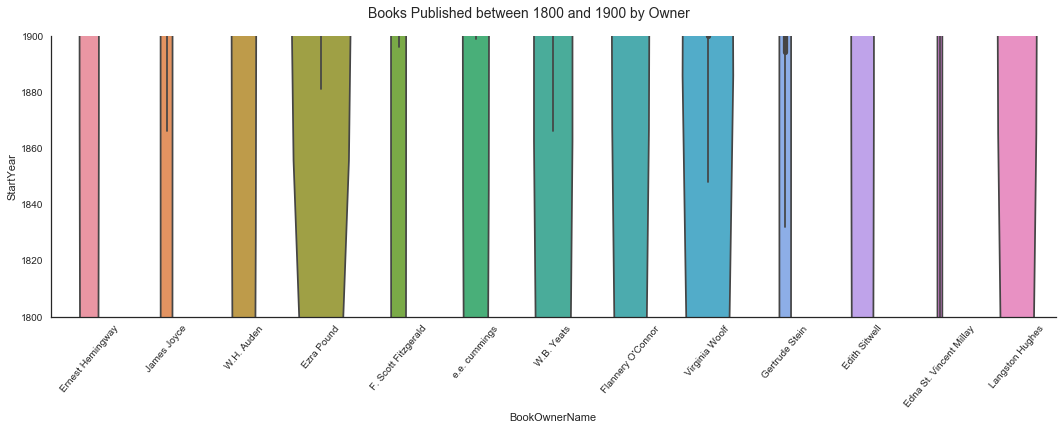

In [169]:
fplot = sns.factorplot(x='BookOwnerName', y='StartYear', data=ownerDateDf, kind='violin', size=5, aspect=3).set_xticklabels(rotation=50)
fig = fplot.fig
fig.suptitle('Books Published between 1800 and 1900 by Owner', fontsize=14)
fplot.fig.subplots_adjust(top=0.9)
plt.ylim(1800,1900)
plt.show()

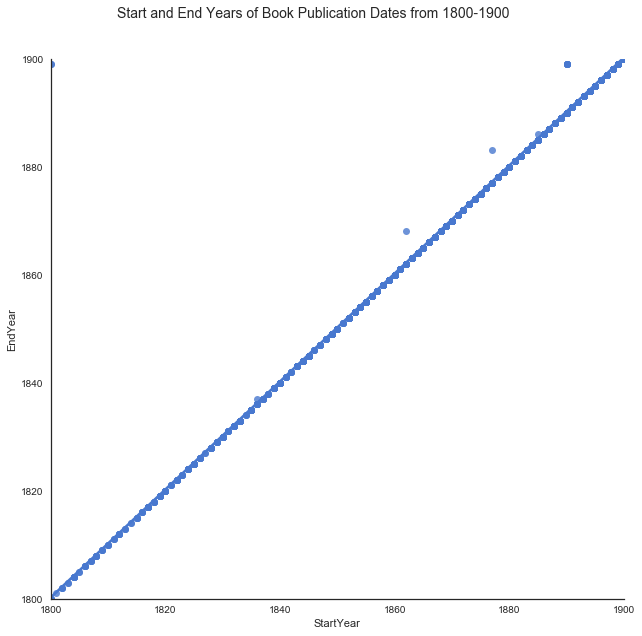

In [254]:
lm = sns.lmplot(x="StartYear", y="EndYear", data=ownerDateDf, size=9)
fig = lm.fig
fig.suptitle("Start and End Years of Book Publication Dates from 1800-1900", fontsize=14)
lm.fig.subplots_adjust(top=0.9)
plt.xlim(1800,1900)
plt.ylim(1800,1900)
plt.show()

**Explore (continued)**


*Start and End Years of Book Publication Dates from 1800-1900*

As indicated in the graph above, most books published between the years 1800 and 1900 have the same StartYear and EndYear values.  This means we can be confident about the time of publication for most of those books.  The books about which we are most uncertain of their publication time are represented by the dots that do not fall on the diagonal line.  Those five dots represent books for which the time of publication is recorded as a range of possible years in the dataset. 





Our researcher wanted to know comparisons could be drawn between the book owners and their libraries.  Below I've created sub-dataframes for each book owner to facilitate the exploration of each book owner's relationship to time, and to allow for the comparison of library sizes across owners:

In [251]:
lim = len(owners)

# Ernest Hemingway's library
pubStartYearErnest = []
pubEndYearErnest = []
bookIDErnest = []
for i in range(0,lim):
    if owners[i] == "Ernest Hemingway":
        pubStartYearErnest += [StartYear[i]] 
        pubEndYearErnest += [EndYear[i]]
        bookIDErnest += [books[i]]
assert len(pubStartYearErnest) == len(bookIDErnest), "There should be an equal number of BookIDs and StartYears"
assert len(pubEndYearErnest) == len(bookIDErnest), "There should be an equal number of BookIDs and EndYears"
ehDf = pd.DataFrame( { 'BookID' : bookIDErnest, 'StartYear' : pubStartYearErnest, 'EndYear' : pubEndYearErnest})

# James Joyce's library
pubStartYearJJ = []
pubEndYearJJ = []
bookIDJJ = []
for i in range(0,lim):
    if owners[i] == "James Joyce":
        pubStartYearJJ += [StartYear[i]] 
        pubEndYearJJ += [EndYear[i]]
        bookIDJJ += [books[i]]
assert len(pubStartYearJJ) == len(bookIDJJ), "There should be an equal number of BookIDs and StartYears"
assert len(pubEndYearJJ) == len(bookIDJJ), "There should be an equal number of BookIDs and EndYears"
jjDf = pd.DataFrame( { 'BookID' : bookIDJJ, 'StartYear' : pubStartYearJJ, 'EndYear' : pubEndYearJJ})

# W.H. Auden's library
pubStartYearWHA = []
pubEndYearWHA = []
bookIDWHA = []
for i in range(0,lim):
    if owners[i] == "W.H. Auden":
        pubStartYearWHA += [StartYear[i]] 
        pubEndYearWHA += [EndYear[i]]
        bookIDWHA += [books[i]]
assert len(pubStartYearWHA) == len(bookIDWHA), "There should be an equal number of BookIDs and StartYears"
assert len(pubEndYearWHA) == len(bookIDWHA), "There should be an equal number of BookIDs and EndYears"
whaDf = pd.DataFrame( { 'BookID' : bookIDWHA, 'StartYear' : pubStartYearWHA, 'EndYear' : pubEndYearWHA})

# Ezra Pound's library
pubStartYearEP = []
pubEndYearEP = []
bookIDEP = []
for i in range(0,lim):
    if owners[i] == "Ezra Pound":
        pubStartYearEP += [StartYear[i]] 
        pubEndYearEP += [EndYear[i]]
        bookIDEP += [books[i]]
assert len(pubStartYearEP) == len(bookIDEP), "There should be an equal number of BookIDs and StartYears"
assert len(pubEndYearEP) == len(bookIDEP), "There should be an equal number of BookIDs and EndYears"
epDf = pd.DataFrame( { 'BookID' : bookIDEP, 'StartYear' : pubStartYearEP, 'EndYear' : pubEndYearEP})

# F. Scott Fitzgerald's library
pubStartYearFSF = []
pubEndYearFSF = []
bookIDFSF = []
for i in range(0,lim):
    if owners[i] == "F. Scott Fitzgerald":
        pubStartYearFSF += [StartYear[i]] 
        pubEndYearFSF += [EndYear[i]]
        bookIDFSF += [books[i]]
assert len(pubStartYearFSF) == len(bookIDFSF), "There should be an equal number of BookIDs and StartYears"
assert len(pubEndYearFSF) == len(bookIDFSF), "There should be an equal number of BookIDs and EndYears"
fsfDf = pd.DataFrame( { 'BookID' : bookIDFSF, 'StartYear' : pubStartYearFSF, 'EndYear' : pubEndYearFSF})

# E. E. Cumming's library
pubStartYearEEC = []
pubEndYearEEC = []
bookIDEEC = []
for i in range(0,lim):
    if owners[i] == "e.e. cummings":
        pubStartYearEEC += [StartYear[i]] 
        pubEndYearEEC += [EndYear[i]]
        bookIDEEC += [books[i]]
assert len(pubStartYearEEC) == len(bookIDEEC), "There should be an equal number of BookIDs and StartYears"
assert len(pubEndYearEEC) == len(bookIDEEC), "There should be an equal number of BookIDs and EndYears"
eecDf = pd.DataFrame( { 'BookID' : bookIDEEC, 'StartYear' : pubStartYearEEC, 'EndYear' : pubEndYearEEC})

# W. B. Yeats' library
pubStartYearWBY = []
pubEndYearWBY = []
bookIDWBY = []
for i in range(0,lim):
    if owners[i] == "W.B. Yeats":
        pubStartYearWBY += [StartYear[i]] 
        pubEndYearWBY += [EndYear[i]]
        bookIDWBY += [books[i]]
assert len(pubStartYearWBY) == len(bookIDWBY), "There should be an equal number of BookIDs and StartYears"
assert len(pubEndYearWBY) == len(bookIDWBY), "There should be an equal number of BookIDs and EndYears"
wbyDf = pd.DataFrame( { 'BookID' : bookIDWBY, 'StartYear' : pubStartYearWBY, 'EndYear' : pubEndYearWBY})

# Flannery O'Connor's library
pubStartYearFO = []
pubEndYearFO = []
bookIDFO = []
for i in range(0,lim):
    if owners[i] == "Flannery O'Connor":
        pubStartYearFO += [StartYear[i]] 
        pubEndYearFO += [EndYear[i]]
        bookIDFO += [books[i]]
assert len(pubStartYearFO) == len(bookIDFO), "There should be an equal number of BookIDs and StartYears"
assert len(pubEndYearFO) == len(bookIDFO), "There should be an equal number of BookIDs and EndYears"
foDf = pd.DataFrame( { 'BookID' : bookIDFO, 'StartYear' : pubStartYearFO, 'EndYear' : pubEndYearFO})

# Virginia Woolf's library
pubStartYearVW = []
pubEndYearVW = []
bookIDVW = []
for i in range(0,lim):
    if owners[i] == "Virginia Woolf":
        pubStartYearVW += [StartYear[i]] 
        pubEndYearVW += [EndYear[i]]
        bookIDVW += [books[i]]
assert len(pubStartYearVW) == len(bookIDVW), "There should be an equal number of BookIDs and StartYears"
assert len(pubEndYearVW) == len(bookIDVW), "There should be an equal number of BookIDs and EndYears"
vwDf = pd.DataFrame( { 'BookID' : bookIDVW, 'StartYear' : pubStartYearVW, 'EndYear' : pubEndYearVW})

# Gertrude Stein's library
pubStartYearGS = []
pubEndYearGS = []
bookIDGS = []
for i in range(0,lim):
    if owners[i] == "Gertrude Stein":
        pubStartYearGS += [StartYear[i]] 
        pubEndYearGS += [EndYear[i]]
        bookIDGS += [books[i]]
assert len(pubStartYearGS) == len(bookIDGS), "There should be an equal number of BookIDs and StartYears"
assert len(pubEndYearGS) == len(bookIDGS), "There should be an equal number of BookIDs and EndYears"
gsDf = pd.DataFrame( { 'BookID' : bookIDGS, 'StartYear' : pubStartYearGS, 'EndYear' : pubEndYearGS})

# Edith Sitwell's library
pubStartYearES = []
pubEndYearES = []
bookIDES = []
for i in range(0,lim):
    if owners[i] == "Edith Sitwell":
        pubStartYearES += [StartYear[i]] 
        pubEndYearES += [EndYear[i]]
        bookIDES += [books[i]]
assert len(pubStartYearES) == len(bookIDES), "There should be an equal number of BookIDs and StartYears"
assert len(pubEndYearES) == len(bookIDES), "There should be an equal number of BookIDs and EndYears"
esDf = pd.DataFrame( { 'BookID' : bookIDES, 'StartYear' : pubStartYearES, 'EndYear' : pubEndYearES})

# Edna St. Vincent Millay's library
pubStartYearEM = []
pubEndYearEM = []
bookIDEM = []
for i in range(0,lim):
    if owners[i] == "Edna St. Vincent Millay":
        pubStartYearEM += [StartYear[i]] 
        pubEndYearEM += [EndYear[i]]
        bookIDEM += [books[i]]
assert len(pubStartYearEM) == len(bookIDEM), "There should be an equal number of BookIDs and StartYears"
assert len(pubEndYearEM) == len(bookIDEM), "There should be an equal number of BookIDs and EndYears"
emDf = pd.DataFrame( { 'BookID' : bookIDEM, 'StartYear' : pubStartYearEM, 'EndYear' : pubEndYearEM})

# Langston Hughes' library
pubStartYearLH = []
pubEndYearLH = []
bookIDLH = []
for i in range(0,lim):
    if owners[i] == "Langston Hughes":
        pubStartYearLH += [StartYear[i]] 
        pubEndYearLH += [EndYear[i]]
        bookIDLH += [books[i]]
assert len(pubStartYearLH) == len(bookIDLH), "There should be an equal number of BookIDs and StartYears"
assert len(pubEndYearLH) == len(bookIDLH), "There should be an equal number of BookIDs and EndYears"
lhDf = pd.DataFrame( { 'BookID' : bookIDLH, 'StartYear' : pubStartYearLH, 'EndYear' : pubEndYearLH})

# new data frame with the size of each book owner's library
libSizes = [ehDf.shape[0], jjDf.shape[0], whaDf.shape[0], epDf.shape[0], fsfDf.shape[0], eecDf.shape[0], wbyDf.shape[0], foDf.shape[0], vwDf.shape[0], gsDf.shape[0], esDf.shape[0], emDf.shape[0], lhDf.shape[0]]
libDf = pd.DataFrame( { 'BookOwnerName' : uniqueOwners, 'LibrarySize' : libSizes })
smallest = np.min(libSizes)
largest = np.max(libSizes)
for index,row in libDf.iterrows():
    if row['LibrarySize'] == smallest:
        print("Smallest Library Owner:", str(row['BookOwnerName']), ",", smallest, "books")
    elif row['LibrarySize'] == largest:
        print("Largest Library Owner:", str(row['BookOwnerName']), ",", largest, "books")
print("Average Library Size:", np.mean(libSizes))

Largest Library Owner: Ernest Hemingway , 7408 books
Smallest Library Owner: Langston Hughes , 141 books
Average Library Size: 1796.23076923


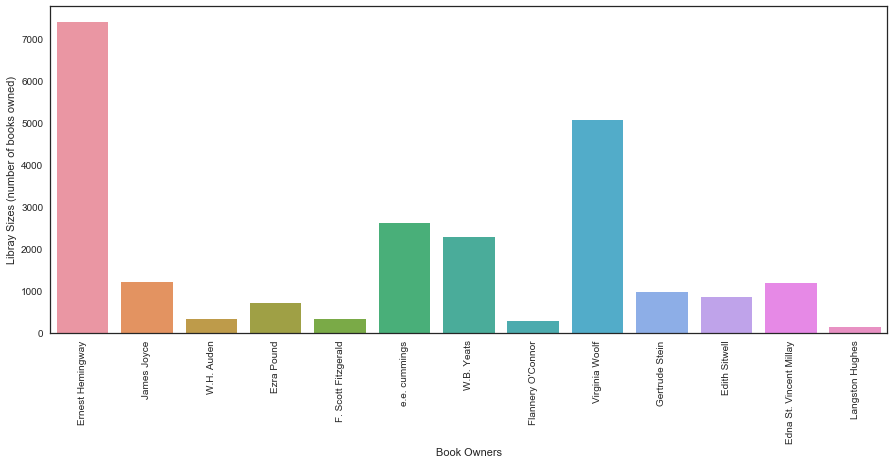

In [241]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x="BookOwnerName", y="LibrarySize", data=libDf)
ax.set(xlabel='Book Owners', ylabel='Libray Sizes (number of books owned)')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

**Explore (continued)**

I'm suspicious of the sizes of Ernest Hemingway and Virginia Woolf's libraries, because they are major outliers among the thirteen book owners.  Could they really have possibly had that many thousands of books?
If the dataset does have accurate records of each book owner's library, there is a large variance of library sizes across the book owners!

The average library size is about 1,796 books, with nine out of the 13 book owners having less than 2,000 books in their libraries.  This makes me feel better about all the books I own, because I thought I bought too many books but I'm nowhere near this average number.  I'm curious to know how Thomas Jefferson's library compared to the size of the library of the book owners in this Modernist Libraries dataset.  Jefferson is known for buying more books than he had the money for (which horrified John Adams), so I wonder whether he had even more books than Ernest Hemingway.

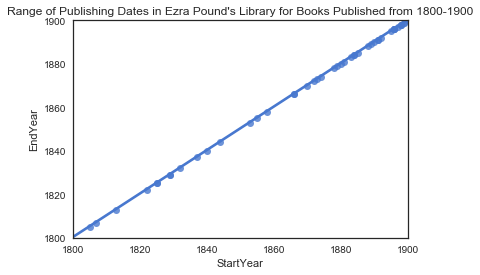

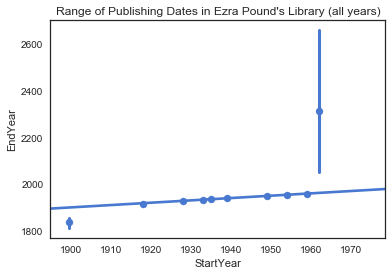

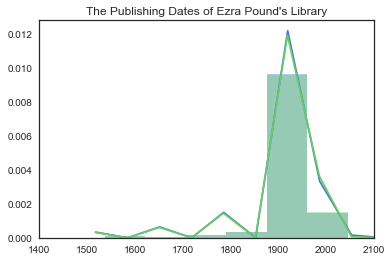

In [177]:
f = sns.regplot(x="StartYear", y="EndYear", data=ezraDf)
f.set_title("Range of Publishing Dates in Ezra Pound's Library for Books Published from 1800-1900")
plt.xlim(1800,1900)
plt.ylim(1800,1900)
plt.show()

g = sns.regplot(x="StartYear", y="EndYear", data=ezraDf, x_bins=10)
g.set_title("Range of Publishing Dates in Ezra Pound's Library (all years)")
plt.show()

EzraStartYear = list(ezraDf.loc[:, 'StartYear'])
EzraEndYear = list(ezraDf.loc[:, 'EndYear'])
chart = sns.distplot(EzraStartYear, bins=100)
chart = sns.distplot(EzraEndYear, bins=100)
chart.set_title("The Publishing Dates of Ezra Pound's Library")
plt.xlim(1400,2100)
plt.show()

Since Ezra Pound died in 1972, his library should not have books published after that year.  The publishing dates of his library's books will need to be investigated.


**Explore (continued)**

Unexpectedly, the BookIDs are not unique identifiers:

In [243]:
bookIDs = list(ml.loc[:, "BookID"])
uniqueBookIDs = np.unique(bookIDs)
assert (len(uniqueBookIDs)) == ml.shape[0], "Each row in the dataset has a unique book ID"

AssertionError: Each row in the dataset has a unique book ID

In [245]:
print("Unique Book IDs:", len(uniqueBookIDs))
print("Rows without unique Book IDs: ", ml.shape[0] - len(uniqueBookIDs))
IDcount = {}
for index,row in ml.iterrows():
    key = row['BookID']
    if key in IDcount:
        IDcount[key] += 1
    else:
        IDcount[key] = 1
        
assert len(IDcount) == len(uniqueBookIDs), "The dictionary should be the same length as the list of unique book IDs"

repeatedBookIDs = []
for key, value in IDcount.items():
    if value > 1:
        repeatedBookIDs += [key]
assert len(repeatedBookIDs) == (ml.shape[0] - len(uniqueBookIDs)), "There should be 100 repeated BookID values"

Unique Book IDs: 23251
Rows without unique Book IDs:  100


Unexpectedly, the dataset did not have the same number of unique work IDs and unique book titles:

In [21]:
workIDs = list(ml.loc[:, "WorkID"])
uniqueWorkIDs = np.unique(workIDs)
assert (len(uniqueWorkIDs)) != ml.shape[0], "Each row in the dataset should not have a unique work ID"

In [27]:
print("Unique Work IDs: ", len(uniqueWorkIDs))
print("Rows without unique Work IDs: ", ml.shape[0] - len(uniqueWorkIDs))

Unique Work IDs:  19889
Rows without unique Work IDs:  3462


In [19]:
bookTitles = list(ml.loc[:, "BookTitle"])
uniqueBookTitles = np.unique(bookTitles)
print("Number of unique book titles:", len(uniqueBookTitles))
# Different number than unique WorkID and unique BookID values

Number of unique book titles: 21259


As expected, the dataset had the same number of unique VIAF IDs and unique book owner names.

In [20]:
bookOwnerVIAFIDs = list(ml.loc[:, "BookOwnerVIAFID"])
uniqueBookOwnerVIAFIDs = np.unique(bookOwnerVIAFIDs)
print("Unique BookOwnerVIAFIDs:", len(uniqueBookOwnerVIAFIDs))
print("Rows without unique BookOwnerVIAFIDs:", ml.shape[0] - len(uniqueBookOwnerVIAFIDs))
assert len(uniqueBookOwnerVIAFIDs) == len(owners), "There should be the same number of distinct book owners and VIAF IDs"

Unique BookOwnerVIAFIDs: 13
Rows without unique BookOwnerVIAFIDs: 23338


**Reflect & Hypothesize**

After completing the above analysis, I've realised I may have been able to make more confident conclusions about the dataset had I focused on one book owner at a time.  In my analysis I focused on one column of the dataset: BookPubDate.  I'd planned to focus my analysis on time, as my researcher had said the relationship of each book owner's library to time was of interest to her.  The further I dove into the BookPubDate column, however, the more challenges I discovered.  To enable comparisons across time, I needed the data in a standard, integer format.  However, this meant I would have to make assumptions about incomplete or invalid date values in the dataset.  I also had to make it easy to identify which rows in the dataset for which I had no time information, because it may be possible to find those rows' publication dates by searching the books online.

Before beginning the above analysis, I thought a single CSV file would be a great data format to start with because it’s so flexible.  However, upon starting my analysis, I found working with so much data (over 20,000 rows) in a flat file to be harder than I'd anticipated.  Next time I conduct exploratory data analysis, I will plan out specific figures that I would like to graph before I begin coding.  Such planning will give me clearer direction during analysis and, as a result, greater efficiency in conducting the analysis.

*Hypotheses*

1. I hypothesize that Ernest Hemingway's library will cover the widest range of time (based on publication dates), and Langston Hughes the least.  This is due to the size of their libraries.  I can go about testing this by cleaning up the unknown and invalid dates in all the owners' libraries, and then determining the minimum and maximum publication dates for each owner's library.

2. I hypothesize that Ernest Hemingway's library will cover the widest range of locations (based on publication details), and Langston Hughes the least.  This is due to the size of their libraries.  I can go about testing this by extracting the cities from the BookPubDetails (perhaps using the Geography2 Python module), adding these cities to their corresponding rows in the owner dataframes, and then using a bar graph or map (depending on the number of cities in the dataset) to see where each owners' books were published.

3. I hypothsize that the book owners also appear in the dataset as authors.  This is due to the fact that the owners lived during overlapping time periods.  I can test this hypothesis by counting the number of times each owner's name appears in the BookAuthorName column.  I'd probably need to look at last name only and change all the letters to be lowercase, because the format of the name values may not be consistent in the BookOwnerName and BookAuthorName columns.